### This tutorial demostrate how to train a deep neural network (DNN) formulated as follows:

## $$x^{(1)}=ReLU(W^{(1)} \times x^{(0)})$$
## $$x^{(2)}=ReLU(W^{(2)} \times x^{(1)})$$
## $$x^{(3)}=ReLU(W^{(3)} \times x^{(2)})$$
## $$y=softmax(W^{(4)} \times x^{(3)})$$

In [1]:
# import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt
# set to plot in the notebook
%matplotlib inline 

# import keras (using tensorflow backend)
import keras

Using TensorFlow backend.


In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.1
config.gpu_options.visible_device_list= '0'
set_session(tf.Session(config=config))

In [3]:
from keras.datasets import cifar10

# set batch size and number of classes
input_shape = (32,32,3)
batch_size = 500
num_classes = 10
epochs = 10

# load cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# convert class vectors to one-hot binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# normalize data to [-1, 1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 127.5
x_test /= 127.5
x_train -= 1.
x_test -= 1.

In [4]:
from keras.models import Sequential

from keras.layers import Dense, Activation, Flatten

def dnn_model(input_shape, num_classes):    
    model = Sequential()
    
    # expand rgb image to a vector
    model.add(Flatten(input_shape=input_shape))
    
    # fc1
    model.add(Dense(256))
    model.add(Activation('relu'))
    
    # fc2
    model.add(Dense(256))
    model.add(Activation('relu'))
    
    # fc3
    model.add(Dense(256))
    model.add(Activation('relu'))
    
    # fc4
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model

model = dnn_model(input_shape, num_classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
__________

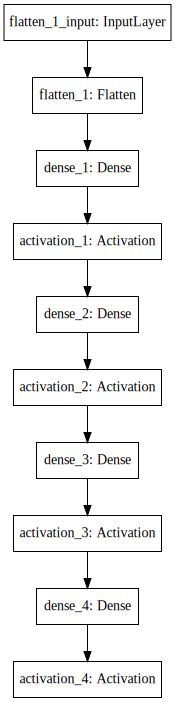

In [5]:
# you can save model diagram by following code
from keras.utils import plot_model
plot_model(model, to_file='dnn_model.png')

# show model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [6]:
# compile model
optimizer = keras.optimizers.sgd()
loss = keras.losses.categorical_crossentropy
metric = keras.metrics.categorical_accuracy
model.compile(loss=loss,optimizer=optimizer,metrics=[metric])

# import image data generator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

# Compute quantities required for feature-wise normalization
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/10
100/100 [==============================] - 1s 10ms/step - loss: 2.1852 - categorical_accuracy: 0.2144 - val_loss: 2.0729 - val_categorical_accuracy: 0.2706
Epoch 2/10
100/100 [==============================] - 1s 6ms/step - loss: 2.0050 - categorical_accuracy: 0.2975 - val_loss: 1.9463 - val_categorical_accuracy: 0.3218
Epoch 3/10
100/100 [==============================] - 1s 7ms/step - loss: 1.9014 - categorical_accuracy: 0.3348 - val_loss: 1.8633 - val_categorical_accuracy: 0.3453
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - loss: 1.8285 - categorical_accuracy: 0.3595 - val_loss: 1.8025 - val_categorical_accuracy: 0.3674
Epoch 5/10
100/100 [==============================] - 1s 7ms/step - loss: 1.7736 - categorical_accuracy: 0.3809 - val_loss: 1.7570 - val_categorical_accuracy: 0.3829
Epoch 6/10
100/100 [==============================] - 1s 7ms/step - loss: 1.7310 - categorical_accuracy: 0.3958 - val_loss: 1.7212 - val_categorical_accuracy: 0.3950
Epo

In [7]:
[train_loss, train_acc] = history.model.evaluate(x=x_train, y=y_train, batch_size=batch_size, verbose=0)
print("Train accuracy:{0:.2f}%.".format(train_acc*100))

Train accuracy:44.33%.


In [8]:
[test_loss, test_acc] = history.model.evaluate(x=x_test, y=y_test, batch_size=batch_size, verbose=0)
print("Test accuracy:{0:.2f}%.".format(test_acc*100))

Test accuracy:43.08%.
